## Principles and Applications of Data Science
## Spring 2021
## Homework 2
## Due Date: Jun 16, 2021

### Name: 吳承岳
### Student ID Number: 109598085

### Reading files, including all data files and a table file for for mapping station name to station ID ###

# Step 1
### 準備檔案名稱及對照表的字典物件

In [6]:
import pandas as pd

In [4]:
#df1 = pd.read_csv('HW2_data/201701.csv', header=None, names=['date', 'hour', 'in(station)', 'out(station)', 'num'])

df2 = pd.read_csv('HW2_data/201702.csv', header=None, names=['date', 'hour', 'in(station)', 'out(station)', 'num'])
correspond = pd.read_csv('HW2_data/Station ID.txt', header=None, sep='\t',
                 names=['English', 'Chinese'])


In [61]:
correspond = correspond[['Chinese', 'English']]

In [6]:
# d = df.set_index('name')['coverage'].to_dict()
id_dict = correspond.set_index('Chinese').to_dict()
id_dict

{'English': {'動物園': 'BR01',
  '木柵': 'BR02',
  '萬芳社區': 'BR03',
  '萬芳醫院': 'BR04',
  '辛亥': 'BR05',
  '麟光': 'BR06',
  '六張犁': 'BR07',
  '科技大樓': 'BR08',
  '中山國中': 'BR12',
  '松山機場': 'BR13',
  '大直': 'BR14',
  '劍南路': 'BR15',
  '西湖': 'BR16',
  '港墘': 'BR17',
  '文德': 'BR18',
  '內湖': 'BR19',
  '大湖公園': 'BR20',
  '葫洲': 'BR21',
  '東湖': 'BR22',
  '南港軟體園區': 'BR23',
  '象山': 'R02',
  '台北101/世貿': 'R03',
  '信義安和': 'R04',
  '大安': 'R05BR09',
  '大安森林公園': 'R06',
  '東門': 'R07O06',
  '台大醫院': 'R09',
  '雙連': 'R12',
  '圓山': 'R14',
  '劍潭': 'R15',
  '士林': 'R16',
  '芝山': 'R17',
  '明德': 'R18',
  '石牌': 'R19',
  '唭哩岸': 'R20',
  '奇岩': 'R21',
  '北投': 'R22',
  '新北投': 'R22A',
  '復興崗': 'R23',
  '忠義': 'R24',
  '關渡': 'R25',
  '竹圍': 'R26',
  '紅樹林': 'R27',
  '淡水': 'R28',
  '新店': 'G01',
  '新店區公所': 'G02',
  '七張': 'G03',
  '小碧潭': 'G03A',
  '大坪林': 'G04',
  '景美': 'G05',
  '萬隆': 'G06',
  '公館': 'G07',
  '台電大樓': 'G08',
  '古亭': 'G09O05',
  '中正紀念堂': 'G10R08',
  '小南門': 'G11',
  '北門': 'G13',
  '中山': 'G14R11',
  '松江南京': 'G15O08',
  '南京復興': 'G1

# Step 2
### Get 20 data items as sample randomly and show them.

In [3]:
df2.sample(20)

,date,hour,in(station),out(station),num
3436587,2017-02-15,0,新埔,七張,0
4699757,2017-02-20,6,東門,景美,0
405434,2017-02-02,16,台北101/世貿,南京復興,15
6107441,2017-02-25,22,府中,台北車站,34
2994593,2017-02-13,7,昆陽,永春,46
5338118,2017-02-22,19,西門,南京復興,61
2644850,2017-02-11,19,象山,景安,13
2130799,2017-02-09,17,忠孝新生,板橋,82
1729327,2017-02-08,1,大坪林,公館,0
2048205,2017-02-09,10,海山,先嗇宮,1


In [10]:
in201702 = df2.drop(columns=['date','hour', 'out(station)'])
in201702.sample(20)

,in(station),num
4880807,芝山,12
3262181,忠孝新生,78
6819568,善導寺,2
6856861,先嗇宮,0
6491316,忠義,0
3300486,三和國中,2
5194497,永安市場,2
2583935,關渡,0
4518767,民權西路,37
1342414,萬芳醫院,4


In [14]:
in201702 = in201702.groupby(by=['in(station)']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()
in201702

,in(station),num
0,台北車站,4657534
1,西門,2416129
2,市政府,1659249
3,忠孝復興,1387887
4,淡水,1118058
5,板橋,1090657
6,中山,1065786
7,新埔,1056769
8,忠孝敦化,1056352
9,劍潭,1026235


In [16]:
in201702['id'] = in201702['in(station)'].map(id_dict['English'])
in201702 = in201702[['id', 'in(station)', 'num']]
in201702

,id,in(station),num
0,BL12R10,台北車站,4657534
1,BL11G12,西門,2416129
2,BL18,市政府,1659249
3,BL15BR10,忠孝復興,1387887
4,R28,淡水,1118058
5,BL07,板橋,1090657
6,G14R11,中山,1065786
7,BL08,新埔,1056769
8,BL16,忠孝敦化,1056352
9,R15,劍潭,1026235


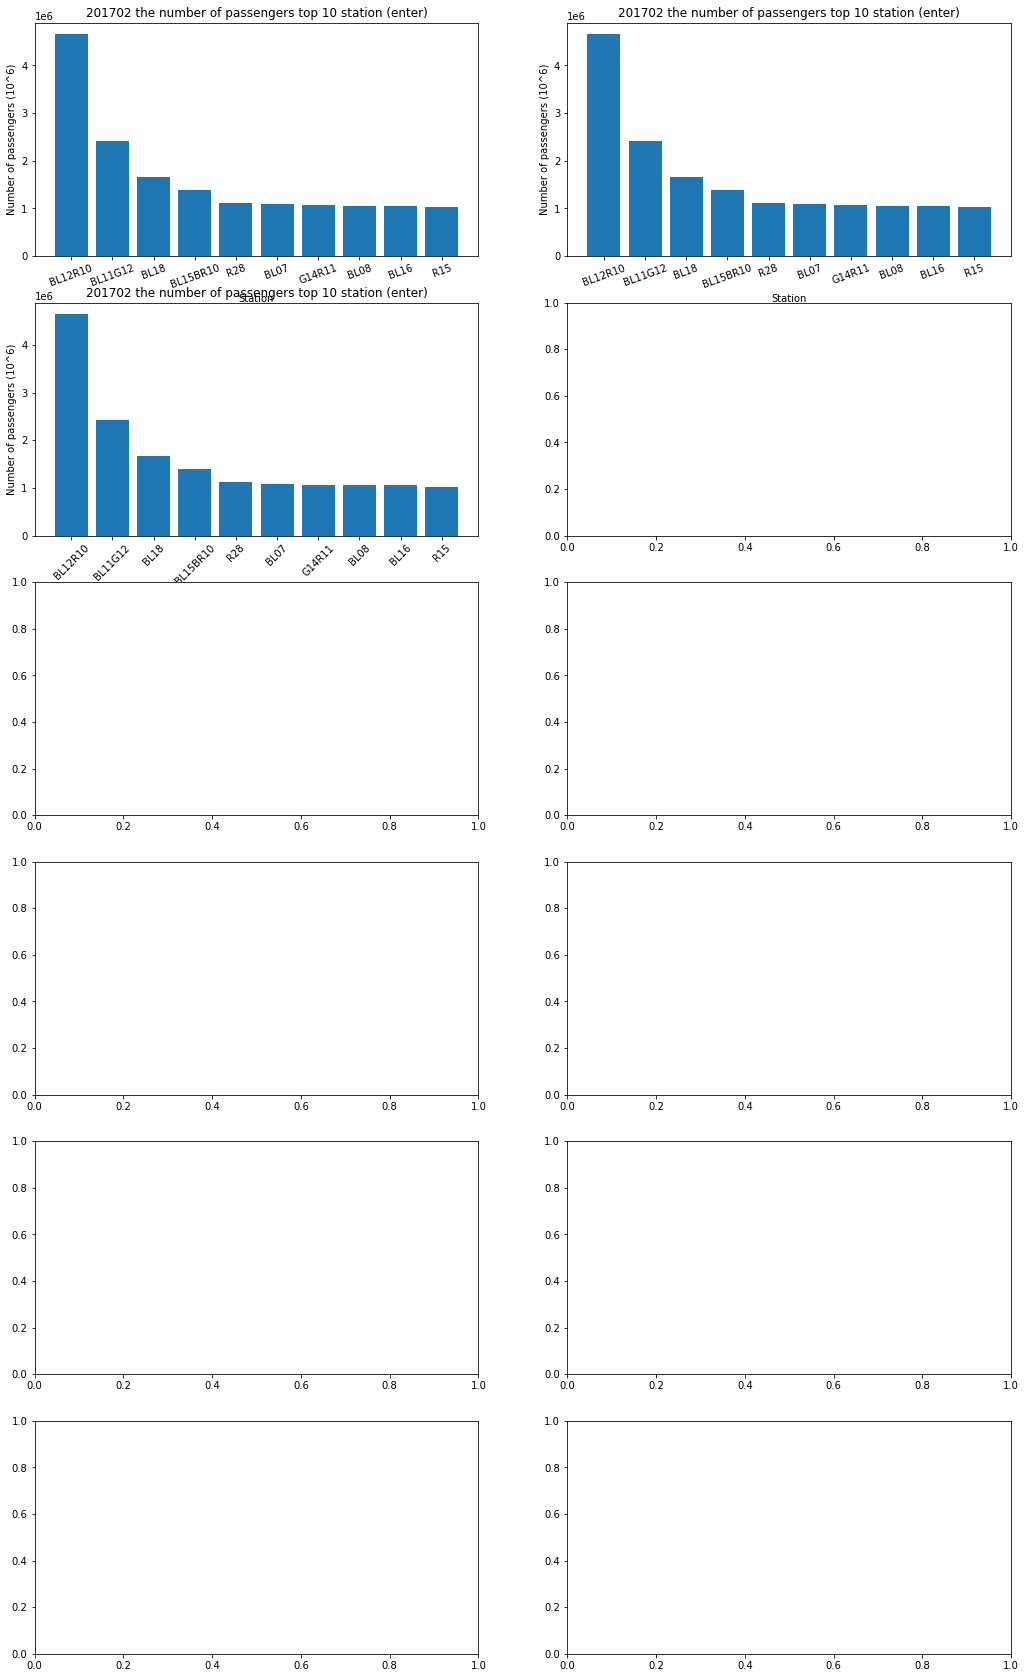

In [84]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(17.5,30))
x = np.arange(len(in201702['id']))
# x = np.arange( 0, 20, 2 )
plt.sca(axes[0, 0])
# plt.figure(figsize=(7.5,5))
plt.bar(x, in201702['num'])
plt.xticks(x, in201702['id'], rotation=20)
plt.xlabel('Station')
plt.ylabel('Number of passengers (10^6)')
plt.title('201702 the number of passengers top 10 station (enter)')
plt.sca(axes[0, 1])
# plt.figure(figsize=(7.5,5))
plt.bar(x, in201702['num'])
plt.xticks(x, in201702['id'], rotation=20)
plt.xlabel('Station')
plt.ylabel('Number of passengers (10^6)')
plt.title('201702 the number of passengers top 10 station (enter)')
plt.sca(axes[1, 0])
# plt.figure(figsize=(7.5,5))
plt.bar(x, in201702['num'])
plt.xticks(x, in201702['id'], rotation=45)
plt.xlabel('Station')
plt.ylabel('Number of passengers (10^6)')
plt.title('201702 the number of passengers top 10 station (enter)')
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (10).

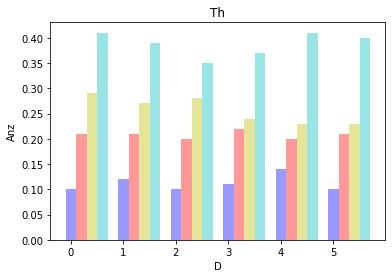

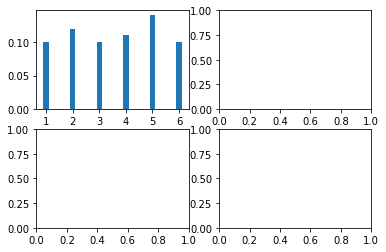

In [60]:
import numpy as np
import matplotlib.pyplot as plt

n= 6

m1 = (0.10,0.12,0.10,0.11,0.14,0.10)
m2=(0.21,0.21,0.20,0.22,0.20,0.21)
m3=(0.29,0.27,0.28,0.24,0.23,0.23)
m4=(0.41,0.39,0.35,0.37,0.41,0.40)
x=[1,2,3,4,5,6]

fig, ax = plt.subplots()

index = np.arange(n)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, m1, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config)

r2 = ax.bar(index + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='r',

                 error_kw=error_config)

r3 = ax.bar(index + bar_width+ bar_width, m3, bar_width,
                 alpha=opacity,
                 color='y',
                 error_kw=error_config)
r4 = ax.bar(index + bar_width+ bar_width+ bar_width, m4, bar_width,
                 alpha=opacity,
                 color='c',
                 error_kw=error_config)                 
plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

f, ax = plt.subplots(nrows=2, ncols=2)

ax[0,0].bar(x,m1, 0.2)
ax[0,0].set_xlabel('Station')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(in201702['id'])
ax[0,1].bar(x,m2, 0.2)
ax[1,0].plot(x,m3)
ax[1,1].plot(x,m4)

# plt.tight_layout()
plt.show()

In [1]:
in201702.drop(columns=['in(station)'], inplace = True)
in201702.sample(20)

NameError: name 'in201702' is not defined

In [ ]:
in201702.groupby(by=['id']).sum().sort_values(by=['num'],ascending=False).head(10)

In [12]:
df2.groupby(by=['in(station)']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()

,in(station),hour,num
0,台北車站,807408,4657534
1,西門,807408,2416129
2,市政府,807408,1659249
3,忠孝復興,807408,1387887
4,淡水,807408,1118058
5,板橋,807408,1090657
6,中山,807408,1065786
7,新埔,807408,1056769
8,忠孝敦化,807408,1056352
9,劍潭,807408,1026235


In [31]:
pd.DataFrame({'count' : df2.groupby( ['in(station)'] ).sum().sort_values(by=['num'],ascending=False)}).reset_index()

ValueError: If using all scalar values, you must pass an index

In [27]:
dataframe.add_suffix('_Count').reset_index()
dataframe.index()

TypeError: 'Index' object is not callable

### Data Manipulation and Ploting Figures ###
You might need [**`numpy`**](https://numpy.org/doc/stable/user/quickstart.html) and [**`matplotlib`**](https://matplotlib.org/stable/users/index.html). One sample of the output figures, `2018_exit`, is attached below.

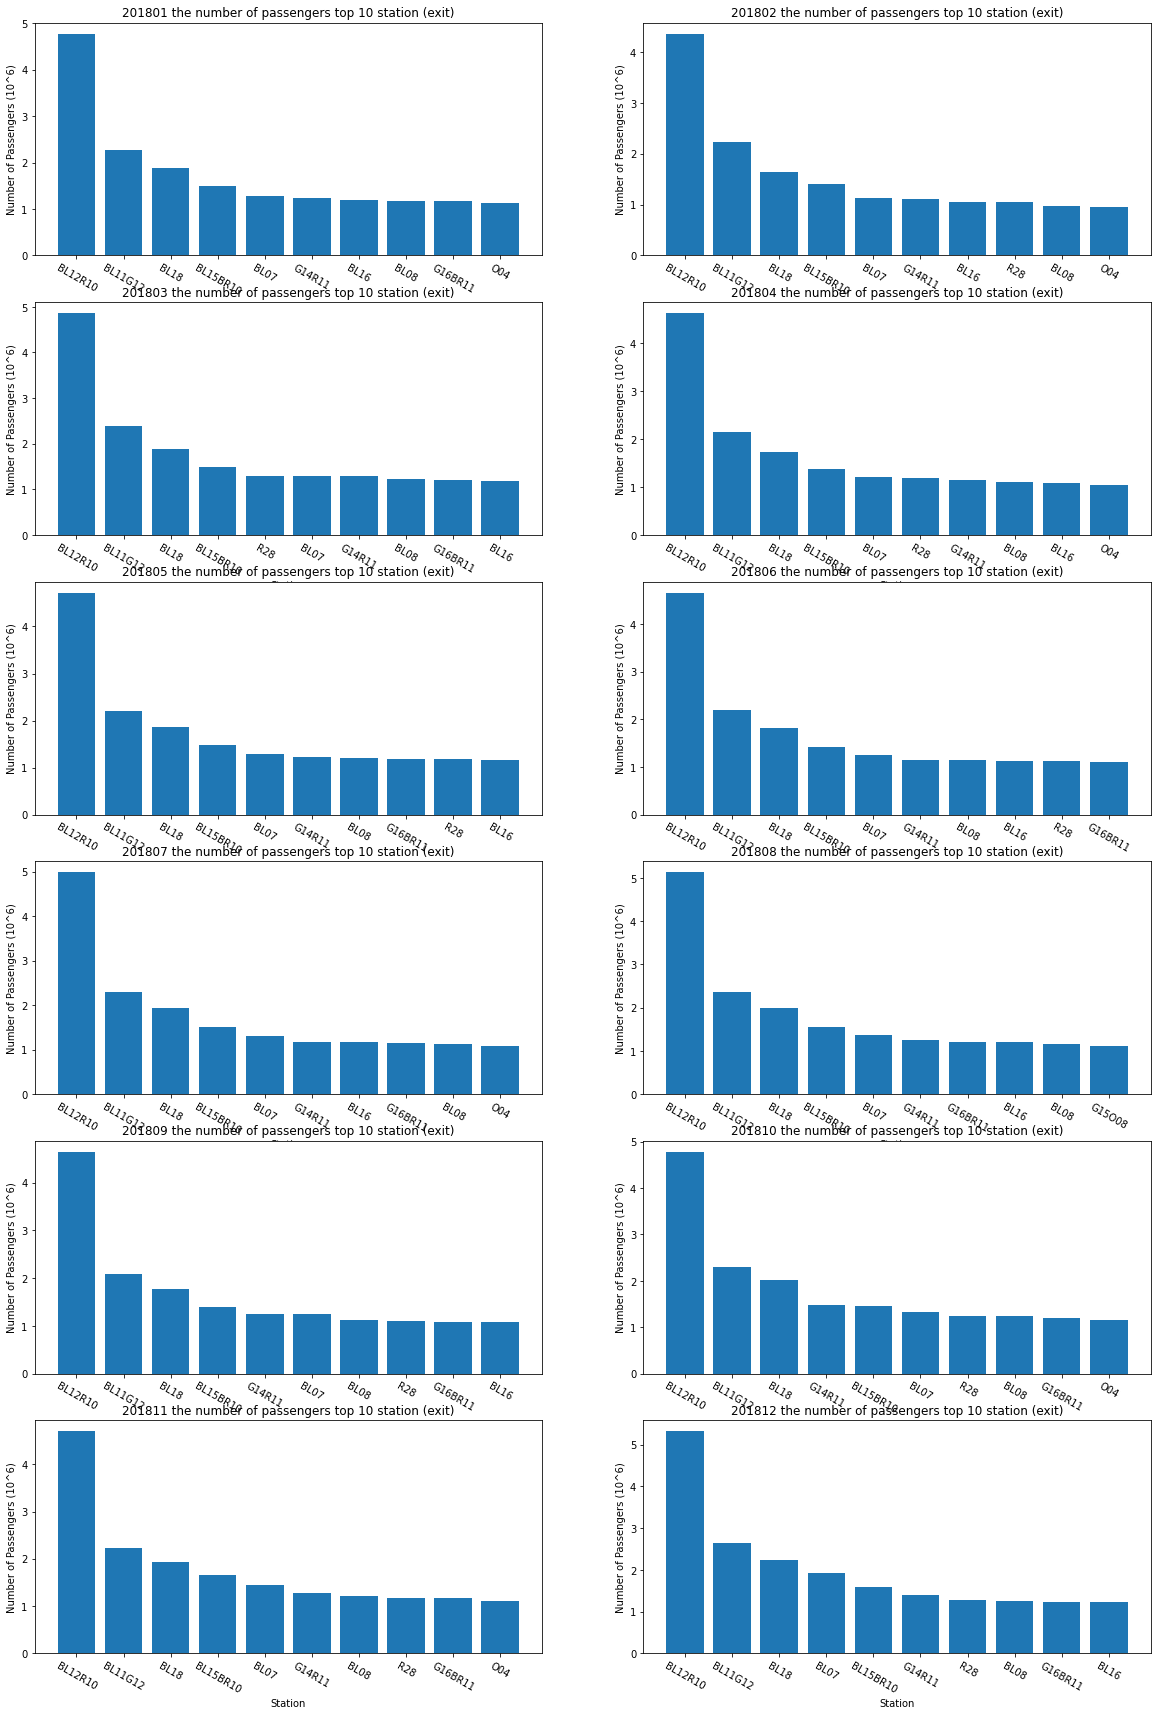

In [6]:
import numpy as np
import matplotlib.pyplot as plt